In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from scipy import ndimage
from photutils import aperture
import numpy as np

In [3]:
continuum = fits.open('fits/member.uid___A001_X158f_Xb8.AT_Pyx_sci.spw19_21_23_25.cont.I.pbcor.fits')[0].data[0][0]

continuum = Cutout2D(continuum,(len(continuum[1])/2,len(continuum[0])/2),(60,60))



[3.02395997e-05]


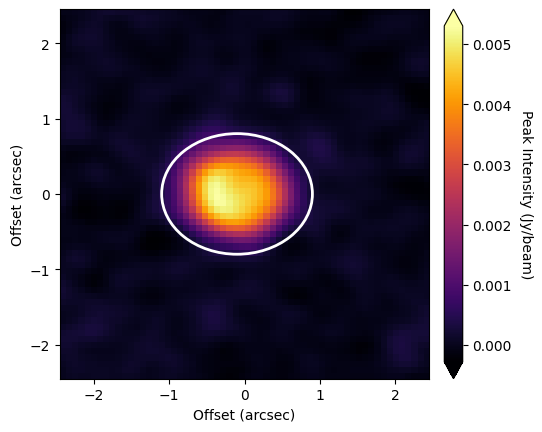

In [4]:
fig, ax = plt.subplots()

positions = [(-0.1, 0)]
m=1
ap = aperture.EllipticalAperture(positions, a=1*m,b=0.8*m)



ap_patches = ap.plot(color='white', lw=2,
                           label='Photometry aperture')

Flux = aperture.ApertureStats(continuum.data, ap).sum


    

im = ax.imshow(continuum.data,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Peak Intensity (Jy/beam)',
                     rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
plt.savefig('ContinuumFlux2.png')
print(Flux)


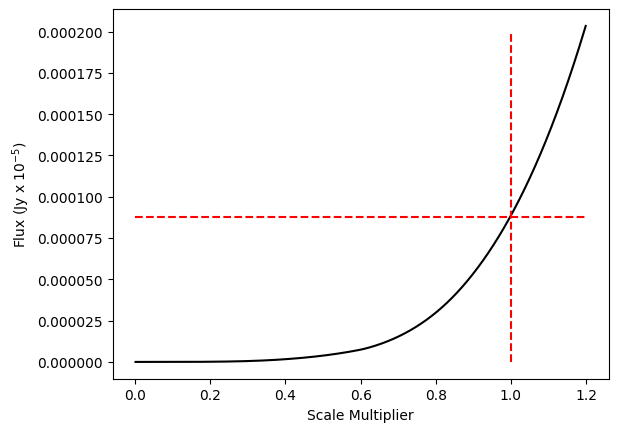

In [10]:
positions = [(-0.1, 0)]
fluxes = []
index = []
for i in range(1,1200):
    ap = aperture.EllipticalAperture(positions, a=1*(i/1000),b=0.8*(i/1000))
    Flux = aperture.ApertureStats(continuum.data, ap).sum
    index.append(i/1000)
    fluxes.append(Flux*(np.pi*1*(i/1000)*0.8*(i/1000))/0.857)


plt.plot(index,fluxes,color='black')
plt.plot(np.ones(50),np.linspace(0,0.0002),linestyle='dashed',color='red')
plt.plot(np.linspace(0,1.2,50),0.000088*np.ones(50),linestyle='dashed',color='red')

plt.xlabel('Scale Multiplier')
plt.ylabel('Flux (Jy x $10^{-5}$)')
plt.savefig('ContinuumFlux1.png')

Text(0, 0.5, 'Offset (arcsec)')

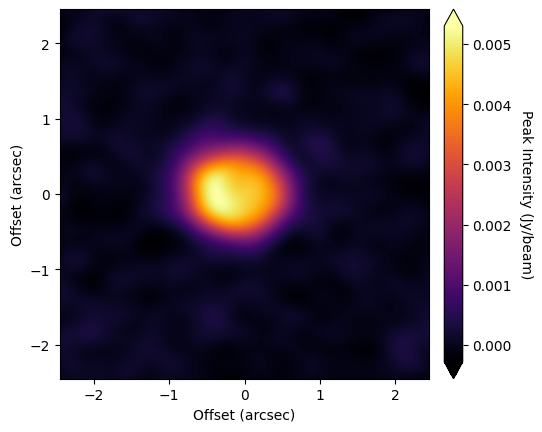

In [6]:
fig, ax = plt.subplots()
contbig = ndimage.zoom(continuum.data,10)
contgauss = ndimage.gaussian_filter(contbig,2)
conthipass = contbig - contgauss


im = ax.imshow(contgauss,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Peak Intensity (Jy/beam)',
                     rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
#plt.savefig('continuumblurred.png')

Text(0, 0.5, 'Offset (arcsec)')

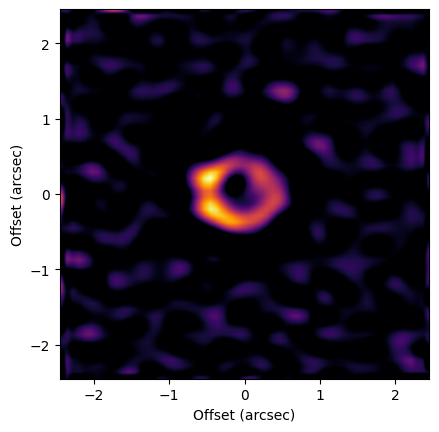

In [62]:
fig, ax = plt.subplots()

im = ax.imshow(conthipass,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9,vmin=0)
#cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
#cb.set_label(r'Peak Intensity (Jy/beam)',rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

Text(0, 0.5, 'Offset (arcsec)')

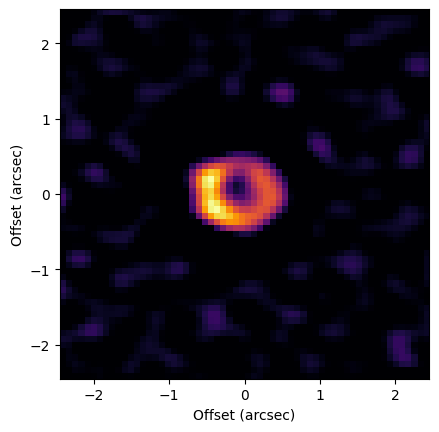

In [64]:
contgauss = ndimage.gaussian_filter(continuum.data,2)
conthipass = continuum.data - contgauss



fig, ax = plt.subplots()

im = ax.imshow(conthipass,
          cmap='inferno',
          extent=[-0.08172*30,0.08172*30,-0.08172*30,0.08172*30],origin='lower',zorder=-9,vmin=0)
#cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
#cb.set_label(r'Peak Intensity (Jy/beam)',rotation=270, labelpad=15)

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')

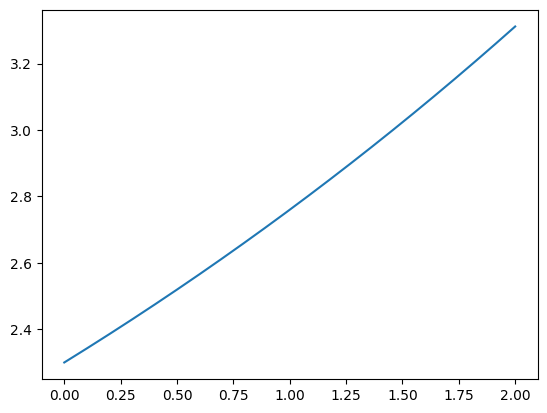

In [41]:
def opacity(beta):
    return 2.3*1.2**beta

beta = np.linspace(0,2,1000)
opa = opacity(beta)

plt.plot(beta,opa)